### This notebook was used to create the stacking 1D toy model. There's no exercises in here, but you can play with the numbers if you like to see what happens.

In [1]:
%matplotlib notebook
%pylab
import scipy.stats as st

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


### We define some functions to represent the signal, and to add noise to it. If you'd like a more realistic dataset, take a look at https://github.com/djreiss/diffimTests which includes functions to simulate images and can add things like PSF jitter, a non-trivial sky etc. 

### Also, it's worth noting that we're generating nice smooth continous functions. Real data from cameras will have to go through an A/D converter. Depending on how you combine the images (try median for instance), you might get unanticpated effects for faint sources.

In [2]:
def get_perfect_model(x):
    pos = 40
    scale = 3
    height = 1
    f = height * sqrt(2*np.pi) * scale * st.distributions.norm.pdf(x, loc=pos, scale=scale)
    return(f)

def get_noisy_model(x, f):
    n = np.random.rand(len(x))*4 - 2.
    return(n+f)

### Plot up our model PSF

<IPython.core.display.Javascript object>


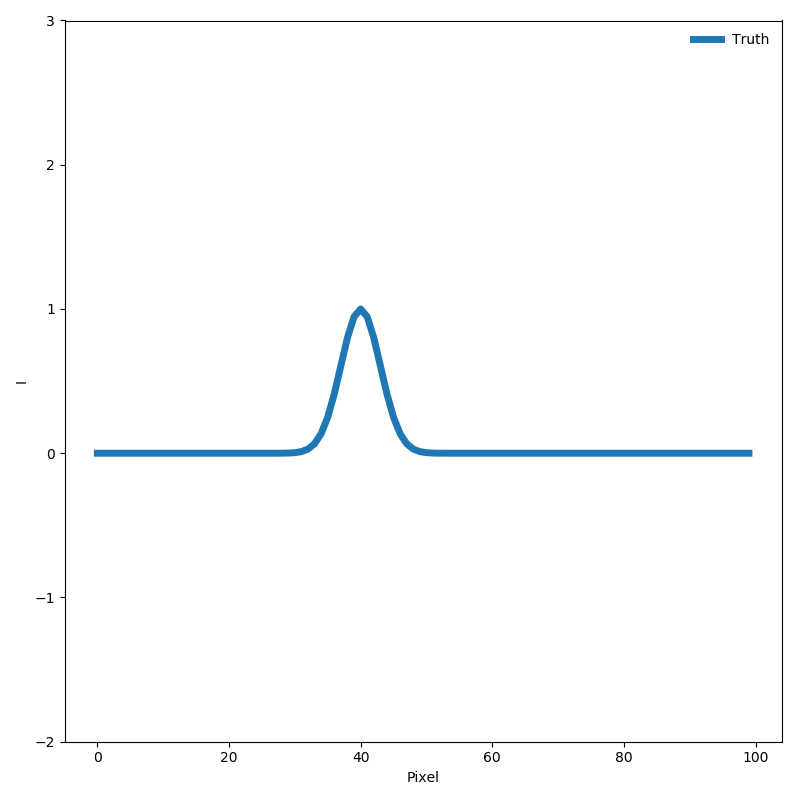

In [3]:
x = np.arange(100)
f = get_perfect_model(x)
figure(figsize=(8,8))
plot(x, f, label='Truth', color='C0', lw=5)
xlabel('Pixel')
ylabel('I')
ylim(-2, 3)
legend(frameon = False)
tight_layout()
savefig('../media/perfect.pdf')

### Generate fake "images," add noise and plot

<IPython.core.display.Javascript object>


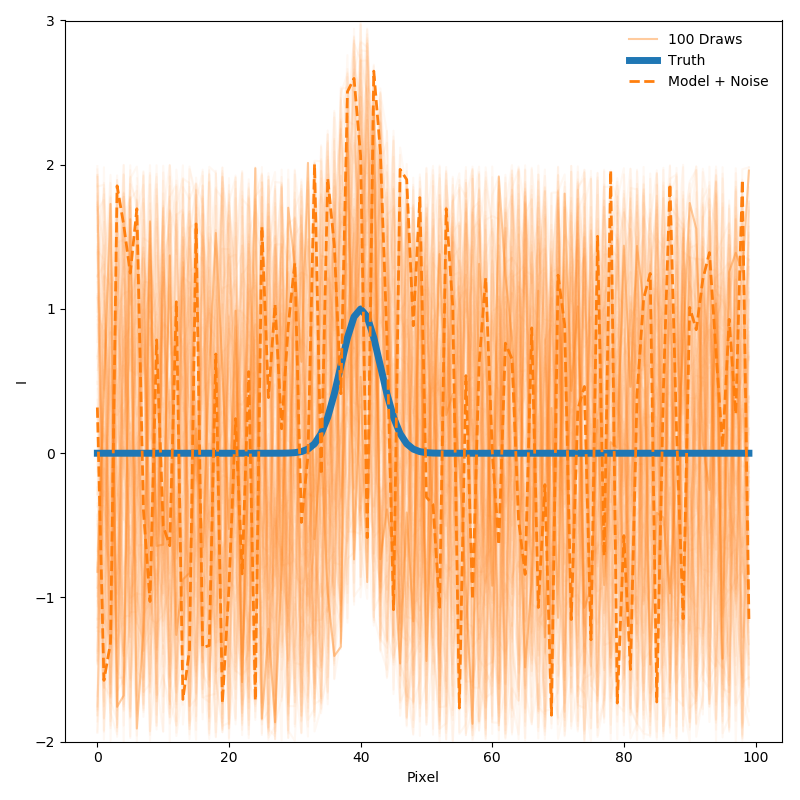

In [4]:
nimages = 1000
im = []
figure(figsize=(8,8))
for i in range(nimages):
    y = get_noisy_model(x, f)
    im.append(y)
    if i%10==0:
        plot(x, y, alpha=0.05, color='C1')
plot(x, y, alpha=0.4, color='C1', label='{:n} Draws'.format(nimages/10))
plot(x, f, label='Truth', color='C0', lw=5)
plot(x, im[0],linestyle='--', label='Model + Noise', color='C1',lw=2)
legend(frameon = False)
xlabel('Pixel')
ylabel('I')
ylim(-2, 3)
tight_layout()
savefig('../media/noisy.pdf')

### Stack the "images." Note that you can already see, even in the toy model that the median shows more noise than the mean. Even DSFP has included statements like "the median is a robust replacement for the mean." It isn't a drop-in replacement in all contexts though...

<IPython.core.display.Javascript object>


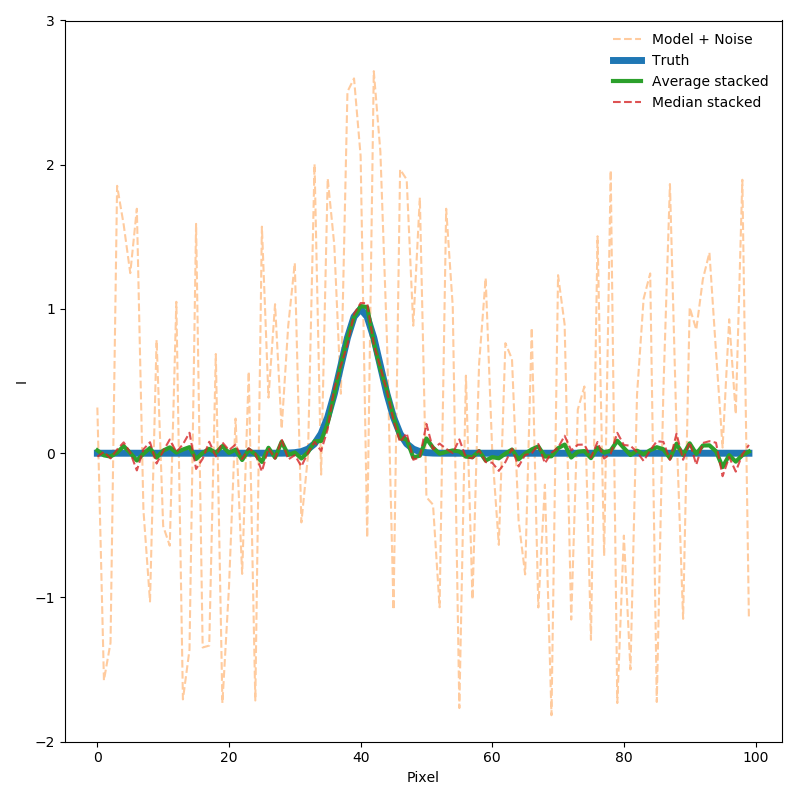

(1000, 100)


In [5]:
figure(figsize=(8,8))
im = np.array(im)
stack = np.cumsum(im, axis=0)
print(stack.shape)
stack1 = np.mean(im, axis=0)
stack2 = np.median(im, axis=0)
plot(x, im[0],linestyle='--', label='Model + Noise', color='C1', alpha=0.4)
plot(x, f, label='Truth', color='C0', lw=5)
plot(x,stack1, label='Average stacked', color='C2', lw=3)
plot(x,stack2, label='Median stacked', color='C3',alpha=0.8, ls='--')
xlabel('Pixel')
ylabel('I')
ylim(-2, 3)
legend(frameon=False)
tight_layout()
savefig('../media/stacked.pdf')

### We can get a coarse estimate of the S/N by taking the peak value and dividing by the RMS error. Really we could just do the integrals and measure the flux, but we've got 1.5 hours for all the workbooks, so why the heck are you even looking at this!!!

<IPython.core.display.Javascript object>


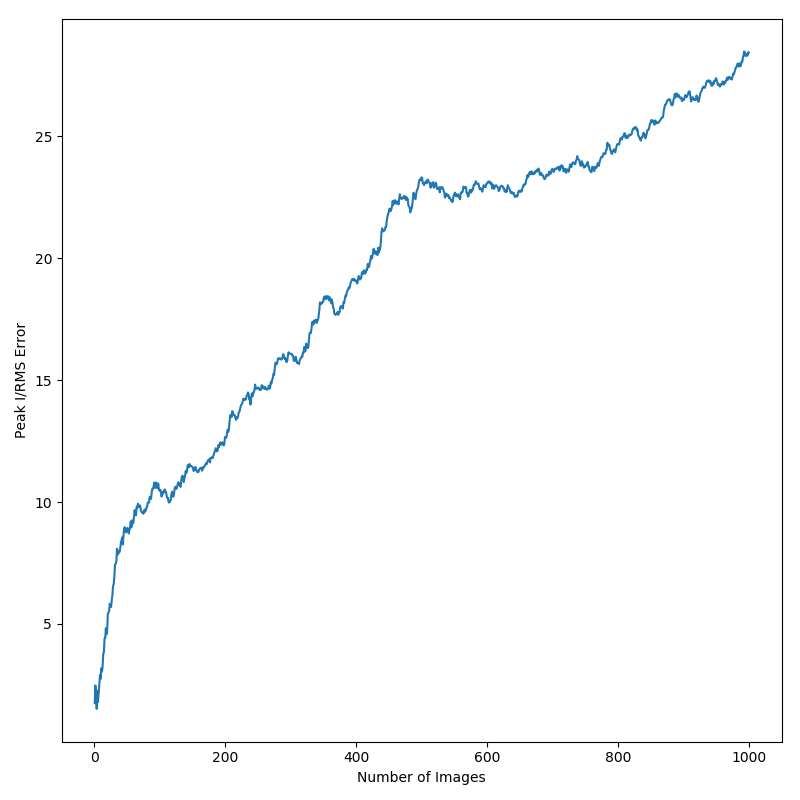

In [6]:
figure(figsize=(8,8))
norm = np.arange(1000)+1
stack_norm = (stack.T[:,]/norm).T
rmse = np.mean((stack_norm - f)**2.,axis=1)**0.5
plot(norm, stack_norm[:,40]/rmse)
xlabel('Number of Images')
ylabel('Peak I/RMS Error')
tight_layout()
savefig('../media/SNR.pdf')